In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

Macro `_latex_std_` created. To execute, type its name (without quotes).
=== Macro contents: ===
get_ipython().run_line_magic('run', 'Latex_macros.ipynb')
 

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
MOVIE_DIR="./images"

CREATE_MOVIE = False # True if you have ffmpeg installed

import training_models_helper
%aimport training_models_helper

tmh = training_models_helper.TrainingModelsHelper()

import mnist_helper
%aimport mnist_helper

mnh = mnist_helper.MNIST_Helper()

import class_helper
%aimport class_helper

clh= class_helper.Classification_Helper()

In [4]:
from sklearn.model_selection import cross_val_score

# Interpreting the coefficients in Linear Models

This section applies only to Linear models (`LinearRegression`, `LogisticRegression`)

It may seem overly specialized, but since these models are used so often, we will spend some time.

Also, because we can assign a meaning to the coefficients, these models are highly interpretable.

## Numeric features
For Linear Regression

$
\hat{\y} = \Theta^T \cdot \x = \sum_{j=1}^n { \Theta_j * \x_j }
$

so for a *unit* change in $\x_j$:

$
\Delta \hat{\y}  =  \Theta_j
$

Thus
$
\Theta_j = { \partial{\hat{\y}} \over { \partial{ \x_j} } }
$

That is, the coefficient $\Theta_j$ is the amount $\hat{\y}$ changes for a $1$ unit change in $\x_j$

Does this mean that, for two features $j, j'$ if
- $\Theta_j > \Theta_{j'}$
- that feature $j$ is more important than $j'$ ?

No.

Unless $\x_j$ and $\x_{j'}$ are on  same scale (e.g., have been standardized)
a change of $1$ unit isn't comparable.

For example
- $\x_j$ in miles, $\x_{j'}$ in inches


What $\Theta_j$ *does* tell you is 
- the direction
- and magnitude

of
how much the prediction changes when the feature changes

This can be useful for interpretation
- In our housing price premium example: premium *increases* with area since $\Theta_j > 0$

Remember that transformations change units of the variables (features or targets).

So the $\Theta_j$ reflects the sensitivity to the change in the *transformed* units, not the original.

Recall the target for Logistic Regression was transformed to log odds
$$\y = \log(\frac{\hat{p}}{1 - \hat{p}})$$

So a unit change in feature $\x_j$ with parameter $\Theta_j$
changes the *odds* $\frac{\hat{p}}{1 - \hat{p}}$ in a *multiplicative* way

$$
\log(\frac{\hat{p}}{1 - \hat{p}}) + \Theta_j = \log{(\frac{\hat{p}}{1 - \hat{p}} * \exp{\Theta_j} ) }
$$
-

### Examples
- Log transform of target: 
    - $\log{\y} =   \Theta_0 + \Theta_1 * \x_1  $
    - $\theta_1 = { \partial{ \log{\y} } \over { \partial{ \x_1 } } } = \% $ change in $\y$ per unit change in $\x_1$
- Log transform of both target and feature:
    - $ \log{\y} =  \Theta_0 + \Theta_1 * \log{\x_1} $   
    - $\Theta_1 = { \partial{ \log{\y} } \over { \partial{ \log{\x_1} } } } = \% $ change in $y$ per $\%$ change in $\x_1$
    
- Standardize feature
    - Transform $\x$ into $z_\x = { { \x - \bar{\x} } \over { \sigma_\x } }$
    - $\y = \Theta_0 + \Theta_1 * z_\x$
    - $\Theta_1 = { \partial{ \log{\y} } \over { \partial{ z_\x } } }$ change in $\y$ per $1$ standard deviation change in $\x$
        - since $z$ is in units of "number of standard deviations"
    

**Remember**
- if you transform features in training, you must apply the same transformation to features in test
    - if the transformation is parameterized, the parameters are determined at **train** fit time, not test !
- if you transform the target, the prediction is in different units than the original
    - you can perform the inverse transformation to get a prediction in original units

## Categorical features

Consider when $x_j$ is a binary categorical feature: $x_j \in \{0,1\}$

Then $\Theta_j$ is the increase in $\y$ associated with $\x_j$ being equal to $1$ rather than $0$.

Just like with numeric features.

Recall our discussion about the dummy variable trap for Linear Regression:
- if we have an intercept (with parameter $\Theta_0$)
    - then $\Theta_0$ is the *contribution* (not increment) to $\y$ when $\x_j = 0$
    - as you can see from equation $\y = \Theta_0 + \ldots + \Theta_j * \x_j$, when $\x_j = 0$

### What's wrong with representing multinomial categorical values as numbers ?

We have already given several reasons why representing Categorical features as numeric is a bad idea.

Now that we can interpret $\Theta_j$, we add another reason to the list.

Let's consider the Passenger Class (`PClass`) variable from the Titanic example:

$
\text{PClass} \in \{ 1, 2, 3 \}
$

- The difference in prediction for 
    - $(PClass = 1)$ vs $(PClass = 2)$, 
    - or $(PClass = 2)$ vs $(PClass = 3)$ 
    - is $\Theta_{\text{PClass}}$
- BUT the difference in prediction for $PClass = 1$ vs $(PClass = 3)$ is $ 2 \times \Theta_{\text{Pclass}}$
    - Is $\y$ (log odds of Survival) impacted by a factor of 2 ?
    - That's what you are saying by representing `PClass` as the integer range $[1,3]$
   

 - What if $\text{Pclass} \in \{ 100, 200, 300 \}$ ?
     - Does changing one class impact log odds of Survival by $100 * \Theta_{\text{PClass}}$ ?

Categorical variables have neither order nor magnitude; integers have both.

Beware of representing Categorical variables with numbers.

## Bucketing/Binning re-visited

Suppose $\x_j$ is a continous numeric feature (e.g., `Age`).

Then a 1 year change in `Age` means that $\y$ changes by $\Theta_j$.

Do you think that 1 year of increase is as important for an adult as for an infant ?
- That's what the regression equation is telling you
- If not, consider
    - Bucketing/Binning continous variables
    - Percent changes

# Interpreting the MNIST classifier: template matching

The $\Theta$ produced by a linear classifier can be viewed as templates
- the strength of $\Theta_j$ tells you how strongly feature $\x_j$ influences the target

So we can interpret $\Theta$ as a "template" for what a model is looking for.

Let's look at the template for 
- The 10 separate, single-digit binary MNIST classifiers
- Or similarly: each *row* of $\Theta$
for the multinomial 10 class MNIST classifier



Here's the training data

Retrieving MNIST_784 from cache


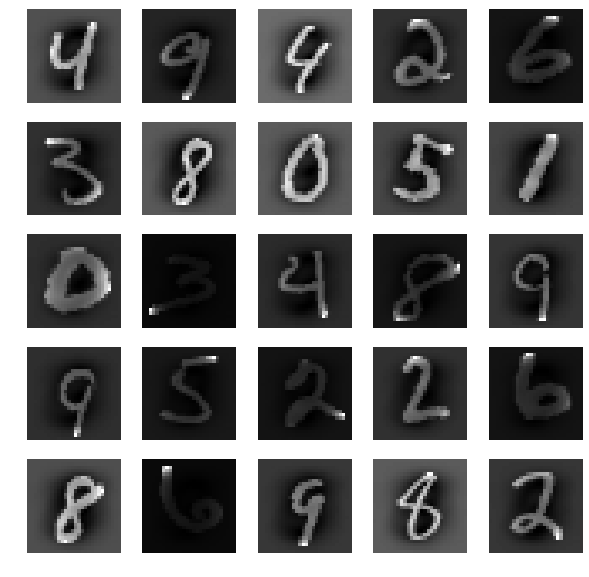

In [5]:
mnh.setup()
mnh.visualize()

Let's fit a `LogisticRegression` model and examine the templates (coefficients $\Theta$)

Example run in 3.128 s


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.1, verbose=0, warm_start=False)

/home/kjp/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


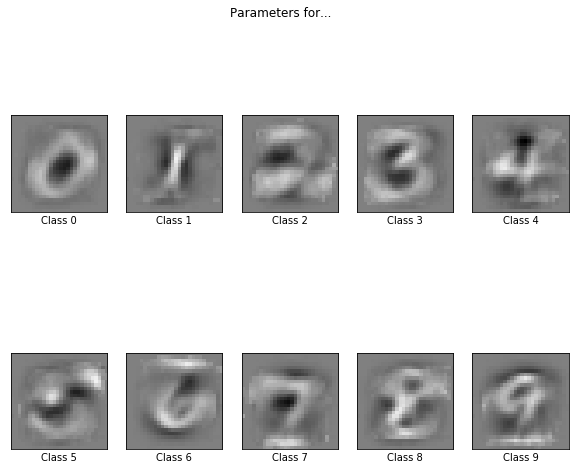

In [6]:
mnh.fit()
mnist_fig, mnist_ax = mnh.plot_coeff()

Recall
- There is one parameter per pixel
- The parameters are ordered in the same way as the linearization of the pixels
    - from $(28 \times 28)$ grid to a vector of 784 numbers.
- We can display the 784 parameters in a $(28 \times 28)$ image to show the intensity of parameter associated with a pixel
- White is high parameter value; Black is low (or negative)

- The template for $0$ emphasizes small values (absence of bright pixels) in the center of the image
- The template for $1$ emphasizes bright vertical pixels
- The template for $8$ emphasizes the absence of bright pixels
    - in the two circles
    - in the pinched waist

You can now imagine how these templates might lead to misclassification

What is the classification of
- a "7" with a strong vertical line in the center (that's what the "1" template tries to match)
- a thin "0" (the "0" template is looking for a large donut)

So interpretation is a very powerful diagnostic tool for both understanding and improving your models.

In [7]:
print("Done")

Done
